<a href="https://colab.research.google.com/github/usaidahmed01/Machine-Learning/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Decision Tree
# ask Question then will get its 2 answers then from 2 answerws ask another question and so on so we will get the tree

In [ ]:
# GINI measures impurity (minimize impurity) [1- (p0^2 + p1^2)]
# Entropy measures Uncertinity (minimize confusion) -[p1 log(p1) + p0 log(p0)]
# limit depth is mandatory

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn import tree
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X , y , test_size= 0.2 , random_state=42)


In [ ]:
# model_GINI = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# model_GINI = DecisionTreeClassifier(criterion='gini', min_samples_split=10, random_state=42)
# min_samples_split=10 jab 10 samples milengy phr hi split karega into nodes

model_GINI = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, random_state=42)
# min_samples_leaf=5 means simples jab split hongay tou resukt mein agar 5 samples nahi milay tou wahin break

# also we can add all of these three to prevent the overfitting

model_GINI.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
model_Entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
model_Entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
Y_pred_GINI = model_GINI.predict(X_test)
Y_pred_Entropy = model_Entropy.predict(X_test)

In [ ]:
print("GINI Tree \n")
print("Accuracy Score" , accuracy_score(Y_test , Y_pred_GINI))
print("Classification Report \n" , classification_report(Y_test , Y_pred_GINI))
print("Confusion Matrix \n" , confusion_matrix(Y_test , Y_pred_GINI))

GINI Tree 

Accuracy Score 0.7540983606557377
Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Confusion Matrix 
 [[25  4]
 [11 21]]


In [ ]:
print("Entropy Tree \n")
print("Accuracy Score" , accuracy_score(Y_test , Y_pred_Entropy))
print("Classification Report \n" , classification_report(Y_test , Y_pred_Entropy))
print("Confusion Matrix \n" , confusion_matrix(Y_test , Y_pred_Entropy))

Entropy Tree 

Accuracy Score 0.819672131147541
Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

Confusion Matrix 
 [[26  3]
 [ 8 24]]


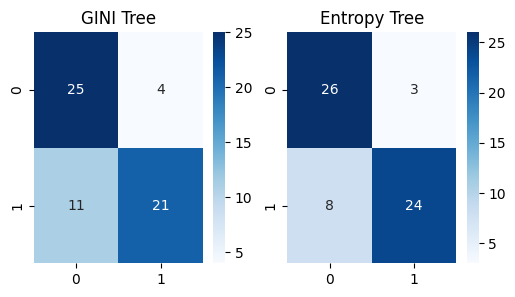

In [ ]:
# Confusion matrix Comparison
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_test , Y_pred_GINI), annot=True, cmap='Blues', fmt='g')
plt.title('GINI Tree')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Y_test , Y_pred_Entropy), annot=True, cmap='Blues', fmt='g')
plt.title('Entropy Tree')
plt.show()

# Matrix Distribution
# TL => TP
# TR => FP
# BL => TN
# BR => FN

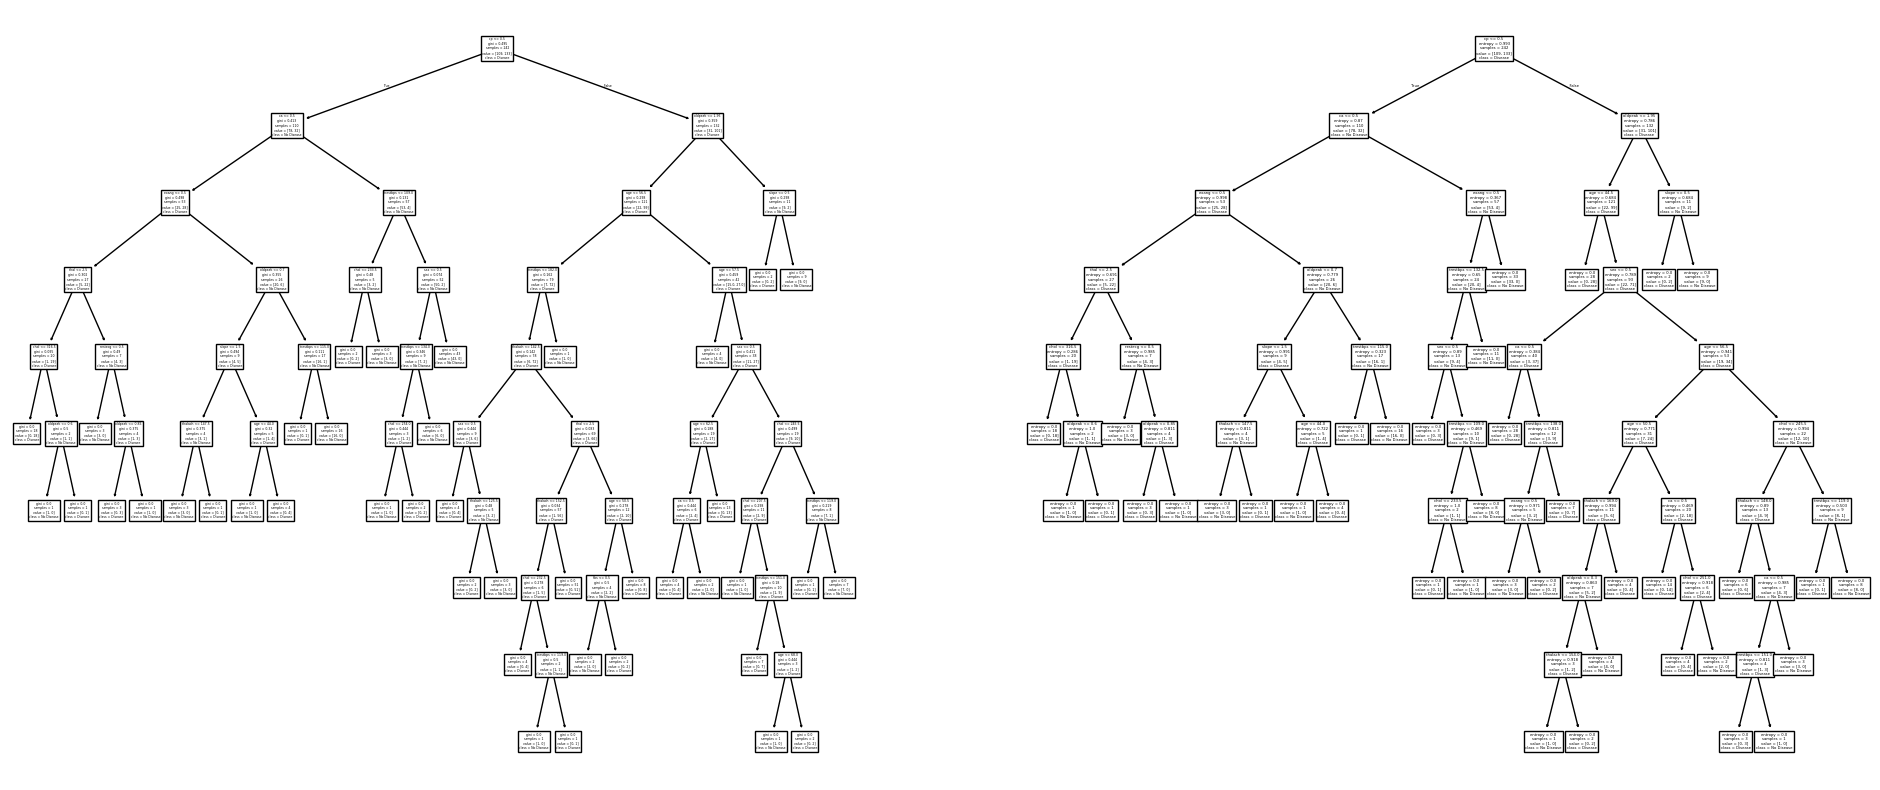

In [ ]:
# Tree for Understanding
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
tree.plot_tree(model_GINI, feature_names=X.columns, class_names=['No Disease' , 'Disease'], max_depth=10)
plt.subplot(1,2,2)
tree.plot_tree(model_Entropy, feature_names=X.columns, class_names=['No Disease' , 'Disease'], max_depth=10)
plt.show()
plt.show()
# So we observed that if we increase the max depth the model will be overfitted